In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
# notice how we used np.random.uniform like in our random_numbers book
# we are also putting the result array into a variable lats=lattitudes
# lngs=longitudes size is how large the array will be  
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

75.94674151587469 -56.369851742639995
-33.15785034036333 -158.95611658106264
-54.29892761037134 0.04004913339022664
-71.78430982818536 -66.02727805941004
53.25626696627356 -128.55583979420356
63.22898155595533 -176.84339079232197
17.66791040580614 149.37031585190937
-85.91435192976364 38.684112394610736
27.948752144224898 -148.9912013754855
37.54351645188041 -170.13042100879196
-23.98610139793159 150.9690157630547
35.32422928444571 -87.15082277819121
-82.90369092320262 -168.56776449671258
87.79455680470764 -141.12257212051168
-52.80995358622042 115.13107281185091
-8.984505426731886 -7.853813495096347
80.29720967992336 114.32958065331457
-82.87221935892603 14.996815145523044
-11.530079829028722 -105.28623682865702
-61.14213503607793 -64.17495448431055
-57.24753113032146 105.46715012032433
-32.14838103180986 -27.027099800766138
-70.81695447882626 -45.78002227225511
-49.00205289836219 -50.68115664811788
-54.55199561098234 42.506332560971885
12.313506865935395 6.794462228567937
-68.7238143

46.47162837658786 -145.8253505338537
-10.808449427286448 -136.07946284316384
62.65892964788216 142.30124422992873
23.065053802205753 92.02292581986939
-46.03933193088205 56.0662262016406
24.432032263071605 -20.550807910259493
-88.59520433417535 110.50609710547525
-74.31545307157172 -168.65313734413925
-67.57179046640536 -170.80701342430223
-73.08032358251722 25.41008244369246
26.948331390508145 174.887755594792
11.160915263593907 107.00181773321134
72.57456929934892 137.16983506557756
69.89473311951286 10.484871495837837
-48.7607458261132 30.700788855928693
40.26205943182231 -173.26724654013657
83.92221247092056 167.92493600915583
42.52736211960496 -95.22129949366762
2.217199546043844 -128.2348556154016
-65.92287652164804 94.45110490970433
16.917626161998186 53.93228167696091
15.794588134614116 -58.12293276670455
44.571282173396696 -38.64940273470643
35.98439804681034 122.60338307296013
-85.04630314601475 -178.57385665307552
10.005722867899735 -136.19065137074801
-79.59948516042837 28.

In [5]:
# importing the citipy module it also has a github account for more info
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

Some of this code should look familiar, but let's break it down:

We create a cities list to store city names.

We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.

We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# # Create an empty list to hold the weather data. this code is later being reused 
# # so this code will be commented out
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters.
# record_count = 1
# set_count = 1
# # In the code block, we have initialized the counters at 1 because we want 
# # the first iteration of the logging for each recorded response and 
# # the set to start at 1.

Loop Through the List of Cities and Build the City URL
Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute after each set of 50 will prevent time-out errors. We can also retrieve the city from the cities list and add it to the city_url by using indexing, as shown in the following code:

In [10]:
# # Loop through all the cities in our list. this code will cause an error is for 
# # example purposes 
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

REASON WHY ABOVE CODE IS WRONG:
Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

Let's break down the code so we understand fully before continuing: (code on the cell below)

We create the for loop with the enumerate() method and reference the index and the city in the list.

In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.

Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.

Also, we add a print statement that tells us the record count and set count, and the city that is being processed.

Then we add one to the record count before the next city is processed.

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
# 
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# We can add a try-except block to our code and, below the tryblock,
# we will parse the data from the JSON file and add the data to the cities list.
# Let's add a try block. Then, below the try block, do the following:
# Parse the JSON file.
# Assign variables for each piece of data we need.
# Add the data to the cities list in a dictionary format.  
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kitimat
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | gladstone
Processing Record 12 of Set 1 | lawrenceburg
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | sao joao da barra
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | east london
Processing Record 23 

Processing Record 33 of Set 4 | sitka
Processing Record 34 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 4 | basco
Processing Record 36 of Set 4 | roma
Processing Record 37 of Set 4 | rudnaya pristan
Processing Record 38 of Set 4 | jiddah
City not found. Skipping...
Processing Record 39 of Set 4 | sainte-savine
Processing Record 40 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | rio claro
Processing Record 47 of Set 4 | lai
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 50 of Set 4 | coshocton
Processing Record 1 of Set 5 | urucui
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | nizh

Processing Record 26 of Set 8 | saint-joseph
Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | donskoye
Processing Record 29 of Set 8 | maroantsetra
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | idrinskoye
Processing Record 32 of Set 8 | taclobo
Processing Record 33 of Set 8 | muisne
Processing Record 34 of Set 8 | kingman
Processing Record 35 of Set 8 | dawei
Processing Record 36 of Set 8 | ayagoz
Processing Record 37 of Set 8 | pouebo
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | ladario
Processing Record 41 of Set 8 | kano
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | antalaha
Processing Record 44 of Set 8 | razole
Processing Record 45 of Set 8 | morro agudo
Processing Record 46 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 47 of Set 8 | mizan teferi
Processing Record 48 of Set 8 | santa rosa
Processing Record 49 of Set 8 | igua

Processing Record 11 of Set 12 | svetlaya
Processing Record 12 of Set 12 | iracoubo
Processing Record 13 of Set 12 | arman
Processing Record 14 of Set 12 | tlaltenango
Processing Record 15 of Set 12 | san luis
Processing Record 16 of Set 12 | riviere-au-renard
Processing Record 17 of Set 12 | motihari
Processing Record 18 of Set 12 | hami
Processing Record 19 of Set 12 | laela
Processing Record 20 of Set 12 | daltenganj
Processing Record 21 of Set 12 | camaqua
Processing Record 22 of Set 12 | channel-port aux basques
Processing Record 23 of Set 12 | sechura
Processing Record 24 of Set 12 | visby
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 27 of Set 12 | pandegelang
Processing Record 28 of Set 12 | dongsheng
Processing Record 29 of Set 12 | bardiyah
Processing Record 30 of Set 12 | yirol
City not found. Skipping...
Processing Record 31 of Set 12 | ojiya
Processing Record 32 of Set 12 | sao sebastiao
P

Let's review the code: (explanation of code starting at Try and ending on the
print)

We parse the JSON file for the current city.
If there is no weather data for the city, i.e., a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
Finally, below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.
IMPORTANT

In [12]:
# this code is to make sure that our previous code retrieve more 
# than 500 random cities if we didnt get enough we would have to go back 
# to our previous code were we generated random latitudes and longituded 
# combinations and increased the size 
len(city_data)

551

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame. we are converting
# the data pull from the ipa and that was placed in the empty list city_data
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,23.95,96,100,9.40,GL,2022-10-15 00:04:21
1,Avarua,-21.2078,-159.7750,80.65,74,15,12.66,CK,2022-10-15 00:04:22
2,Cape Town,-33.9258,18.4232,60.91,79,20,18.41,ZA,2022-10-15 00:00:00
3,Ushuaia,-54.8000,-68.3000,55.06,50,40,18.41,AR,2022-10-15 00:03:57
4,Kitimat,54.0524,-128.6534,58.91,23,100,1.16,CA,2022-10-15 00:04:22
5,Provideniya,64.3833,-173.3000,31.24,77,73,9.31,RU,2022-10-15 00:04:23
6,Airai,-8.9266,125.4092,69.80,62,88,2.66,TL,2022-10-15 00:04:23
7,Port Elizabeth,-33.9180,25.5701,61.32,99,100,4.00,ZA,2022-10-15 00:03:48
8,Hilo,19.7297,-155.0900,88.29,75,40,10.36,US,2022-10-15 00:04:24
9,Kapaa,22.0752,-159.3190,80.92,79,75,16.11,US,2022-10-15 00:04:24


In [19]:
# rearranging the order of the columns in our city_data_df
# easisest way is to assing a variable and put our columns names in the 
# order we want them and then call that variable into the exicisting dataframe
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity','Cloudiness', 'Wind Speed']
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-10-15 00:04:21,72.7868,-56.1549,23.95,96,100,9.40
1,Avarua,CK,2022-10-15 00:04:22,-21.2078,-159.7750,80.65,74,15,12.66
2,Cape Town,ZA,2022-10-15 00:00:00,-33.9258,18.4232,60.91,79,20,18.41
3,Ushuaia,AR,2022-10-15 00:03:57,-54.8000,-68.3000,55.06,50,40,18.41
4,Kitimat,CA,2022-10-15 00:04:22,54.0524,-128.6534,58.91,23,100,1.16
5,Provideniya,RU,2022-10-15 00:04:23,64.3833,-173.3000,31.24,77,73,9.31
6,Airai,TL,2022-10-15 00:04:23,-8.9266,125.4092,69.80,62,88,2.66
7,Port Elizabeth,ZA,2022-10-15 00:03:48,-33.9180,25.5701,61.32,99,100,4.00
8,Hilo,US,2022-10-15 00:04:24,19.7297,-155.0900,88.29,75,40,10.36
9,Kapaa,US,2022-10-15 00:04:24,22.0752,-159.3190,80.92,79,75,16.11


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

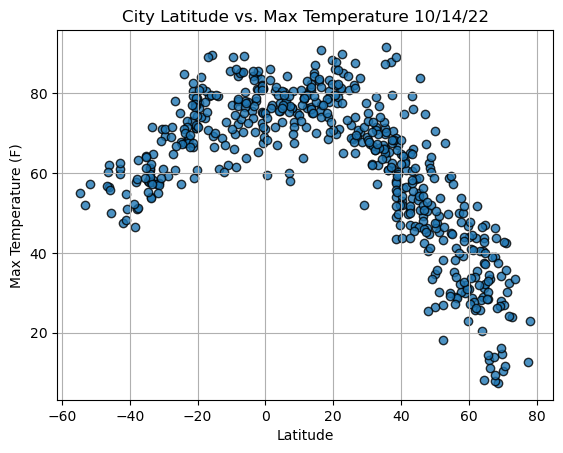

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


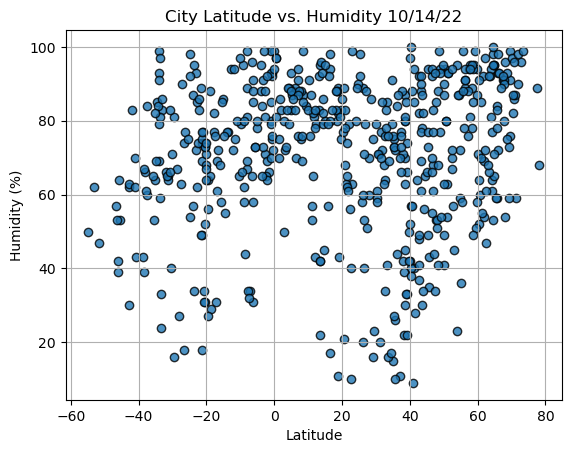

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

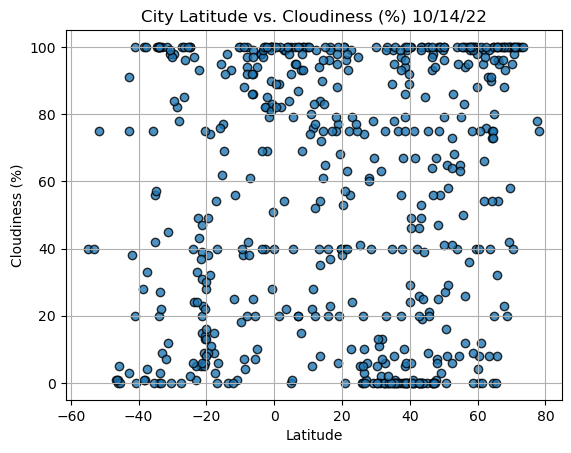

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

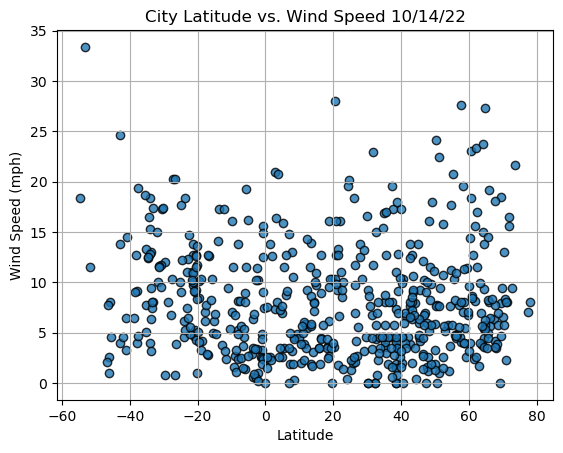

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
#   If we run this code there will be no output until we call the function with five parameters.  

Create the Hemisphere DataFrames
We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.

In [32]:
# this line of code is partaining to the comments above this cell
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2022-10-15 00:04:26
Lat                       69.4541
Lng                     -133.0374
Max Temp                    27.93
Humidity                       76
Cloudiness                     58
Wind Speed                   18.5
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.



In [31]:
# this code is pertaining the comments above
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
546    False
547    False
548     True
549     True
550    False
Name: Lat, Length: 551, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for 

latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

In [33]:
# code pertaining the comments above
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-10-15 00:04:21,72.7868,-56.1549,23.95,96,100,9.40
4,Kitimat,CA,2022-10-15 00:04:22,54.0524,-128.6534,58.91,23,100,1.16
5,Provideniya,RU,2022-10-15 00:04:23,64.3833,-173.3000,31.24,77,73,9.31
8,Hilo,US,2022-10-15 00:04:24,19.7297,-155.0900,88.29,75,40,10.36
9,Kapaa,US,2022-10-15 00:04:24,22.0752,-159.3190,80.92,79,75,16.11
...,...,...,...,...,...,...,...,...,...
541,Kermanshah,IR,2022-10-15 00:19:25,34.3142,47.0650,63.50,17,0,4.61
542,Damietta,EG,2022-10-15 00:19:25,31.4165,31.8133,70.41,70,63,4.43
544,Kisangani,CD,2022-10-15 00:19:26,0.5167,25.2000,68.25,97,100,2.53
548,Norman Wells,CA,2022-10-15 00:20:27,65.2820,-126.8329,28.44,59,0,3.44


In [34]:
# Also, since this is a DataFrame, we can add the head() method
# at the end to get the first five rows, not counting the row of column 
# headings.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-10-15 00:04:21,72.7868,-56.1549,23.95,96,100,9.40
4,Kitimat,CA,2022-10-15 00:04:22,54.0524,-128.6534,58.91,23,100,1.16
5,Provideniya,RU,2022-10-15 00:04:23,64.3833,-173.3000,31.24,77,73,9.31
8,Hilo,US,2022-10-15 00:04:24,19.7297,-155.0900,88.29,75,40,10.36
9,Kapaa,US,2022-10-15 00:04:24,22.0752,-159.3190,80.92,79,75,16.11


In [35]:
# Create Northern and Southern Hemisphere DataFrames. the previous cells of 
# code were practice to get to this point
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]